In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Blood_Pressure_data.csv")
data.shape

(101766, 50)

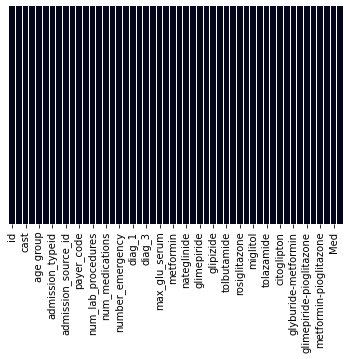

In [5]:
df=data.copy()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [6]:
df.head(2)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5


In [7]:
df.isnull().values.any()

False

In [8]:
df.replace("?", np.nan, inplace=True)
df.head(2)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5


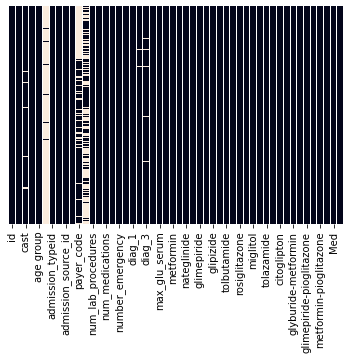

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

id                              0
patient_no                      0
cast                         2273
gender                          0
age group                       0
weight                      98569
admission_typeid                0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [12]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [13]:
df.isnull().values.any()
df.head(2)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),[75-100),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   patient_no                101766 non-null  int64 
 2   cast                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age group                 101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_typeid          101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [15]:
listgender= df['gender'].mode()[0]
listgender
df['gender']= df['gender'].replace('Unknown/Invalid', listgender)

In [16]:
data_map={'Female': 0, 'Male' : 1}
df['gender']=df['gender'].map(data_map)


In [17]:

data_map={'MC': 0, 'MD' : 1, 'HM' : 2, 'UN' : 3, 'BC' : 4, 'SP' : 5 , 'CP' : 6, 'SI' : 7, 'DM' : 8, 'CM' : 9, 'CH' : 10, 'PO' : 11, 'WC' : 12, 'OT' : 13, 'OG' : 14, 'MP' : 15, 'FR' : 16 }
df['payer_code']=df['payer_code'].map(data_map)

In [18]:
data_map={'[0-25)': 25, '[25-50)' : 50, '[50-75)' : 75, '[75-100)' : 100, '[100-125)' : 125, '[125-150)' : 150 , '[150-175)' : 175, '[175-200)' : 200, '>200' : 200 }
df['weight']=df['weight'].map(data_map)

data_map={'[0-10)': 5, '[10-20)' : 15, '[20-30)' : 25, '[30-40)' : 35, '[40-50)' : 45, '[50-60)' : 55 , '[60-70)' : 65, '[70-80)' : 75, '[80-90)' : 85, '[90-100)' : 95 }
df['age group']=df['age group'].map(data_map)

data_max_glu_serum_map={'None': 0, '>300' : 1, 'Norm' : 2, '>200' : 3}
df['max_glu_serum']=df['max_glu_serum'].map(data_max_glu_serum_map)

In [19]:
data_A1Cresult_map={'None': 0, '>7' : 1, 'Norm' : 2, '>8' : 3}
df['A1Cresult']=df['A1Cresult'].map(data_A1Cresult_map)

data_change_map={'No': 0, 'Ch' : 1}
df['change']=df['change'].map(data_change_map)

data_cast_map={'Caucasian': 0, 'AfricanAmerican' : 1, 'Hispanic' : 2, 'Other' : 4, 'Asian' : 3}
df['cast']=df['cast'].map(data_cast_map)

data_Med_map={'No': 0, 'Yes' : 1}
df['Med']=df['Med'].map(data_Med_map)

data_metformin_map={'No': 0, 'Steady' : 1}
df['metformin-rosiglitazone']=df['metformin-rosiglitazone'].map(data_metformin_map)


In [20]:
list_map = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','glipizide', 'glyburide', 'pioglitazone','rosiglitazone', 'acarbose','miglitol', 'tolazamide','insulin','glyburide-metformin']

for i in list_map:
    data_map={'No': 0, 'Steady' : 1, 'Up' : 2, 'Down' : 3}
    df[i]=df[i].map(data_map)


In [21]:
list_mapp=['acetohexamide', 'tolbutamide','troglitazone', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-pioglitazone' ]

for i in list_mapp:
    data_map={'No': 0, 'Steady' : 1}
    df[i]=df[i].map(data_map)


In [22]:
data_map={'NO': 0, '>5' : 1, '<30' : 2}
df['label']=df['label'].map(data_map)


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
for y in df.columns:
    if(df[y].dtype == np.object):
        label_encoder_x= LabelEncoder()  
        df[y]= label_encoder_x.fit_transform(df[y])

<ipython-input-23-83ea9913df80>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(df[y].dtype == np.object):


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   id                        101766 non-null  int64
 1   patient_no                101766 non-null  int64
 2   cast                      101766 non-null  int64
 3   gender                    101766 non-null  int64
 4   age group                 101766 non-null  int64
 5   weight                    101766 non-null  int64
 6   admission_typeid          101766 non-null  int64
 7   discharge_disposition_id  101766 non-null  int64
 8   admission_source_id       101766 non-null  int64
 9   time_in_hospital          101766 non-null  int64
 10  payer_code                101766 non-null  int64
 11  medical_specialty         101766 non-null  int64
 12  num_lab_procedures        101766 non-null  int64
 13  num_procedures            101766 non-null  int64
 14  num_medications     

In [25]:
copy_df=df.copy()
copy_df.head(2)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,0,0,5,100,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,0,0,15,100,1,1,7,3,...,0,2,0,0,0,0,0,1,1,1


In [26]:
copy_df.isnull().values.any()


False

In [27]:
matrix=copy_df.corr()
matrix['label'].sort_values(ascending=False)


label                       1.000000
number_inpatient            0.234283
number_diagnoses            0.104820
number_emergency            0.103024
number_outpatient           0.068552
insulin                     0.067420
time_in_hospital            0.057718
patient_no                  0.057623
Med                         0.057306
num_medications             0.051772
change                      0.042504
num_lab_procedures          0.037976
admission_source_id         0.031816
age group                   0.030271
diag_3                      0.022578
glipizide                   0.018611
repaglinide                 0.017340
discharge_disposition_id    0.012450
acarbose                    0.009531
max_glu_serum               0.008473
pioglitazone                0.007651
miglitol                    0.007189
diag_2                      0.005923
nateglinide                 0.002694
rosiglitazone               0.002582
glipizide-metformin         0.001980
glimepiride-pioglitazone    0.001959
a

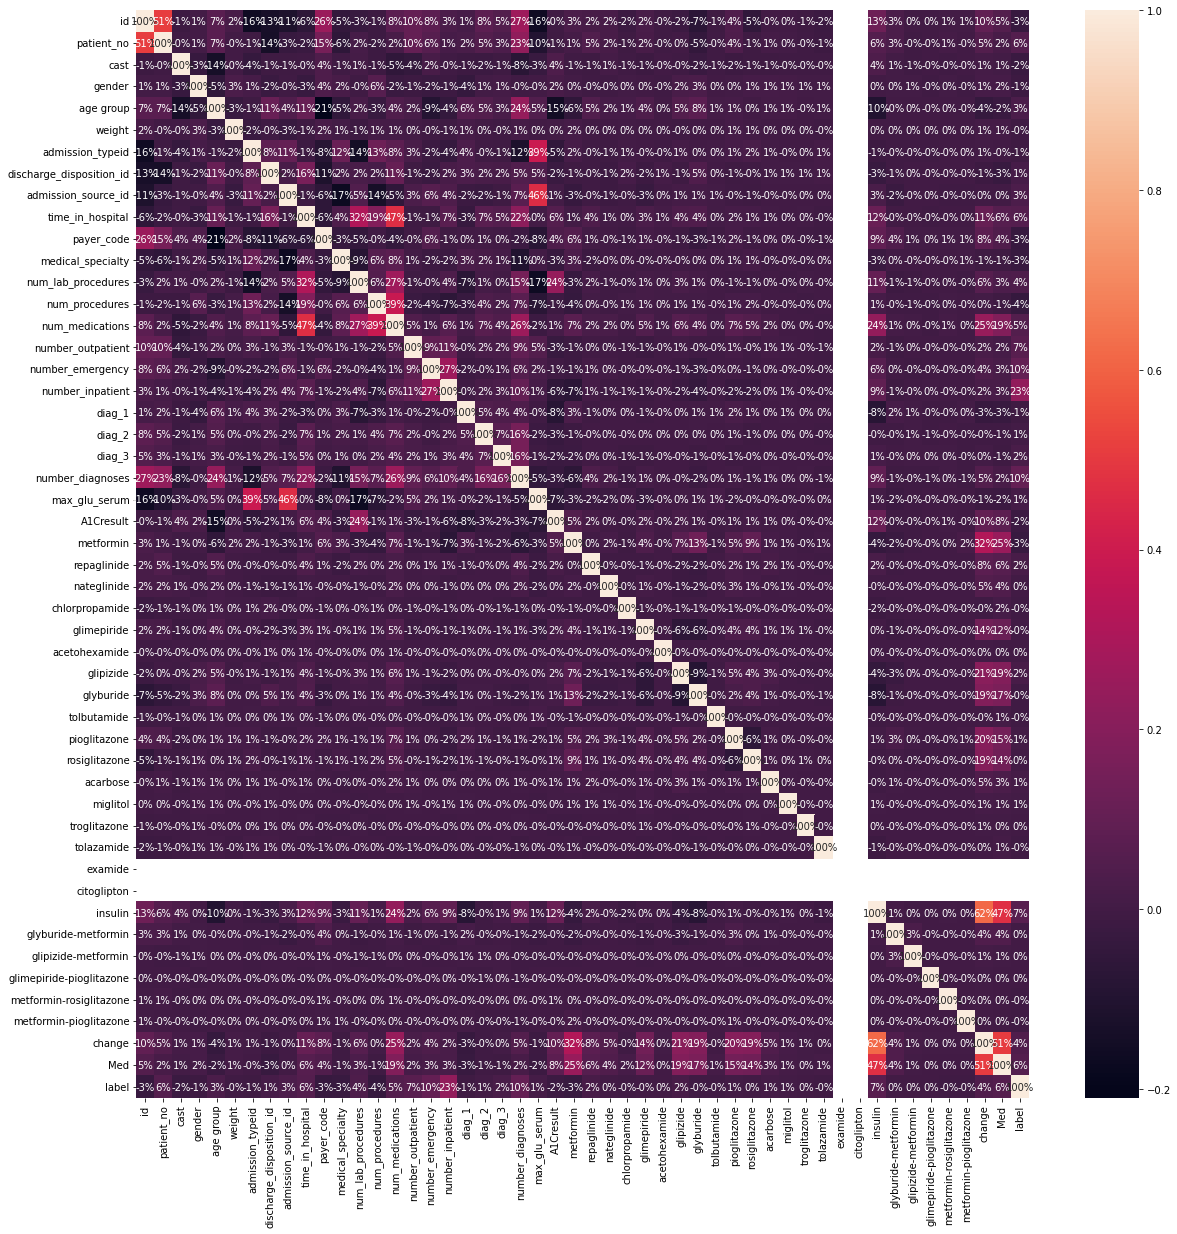

In [28]:

plt.figure(figsize=(20,20))
sns.heatmap(copy_df.corr(), annot=True, fmt='.0%')


In [29]:
drop_list = ['max_glu_serum','acarbose','pioglitazone', 'miglitol', 'admission_typeid', 'medical_specialty','examide', 'citoglipton' ]
copy_df.drop(drop_list, axis=1, inplace=True)
copy_df.drop(['num_procedures'], axis=1, inplace=True)
copy_df.drop(['change'], axis=1, inplace=True)

In [30]:
copy_df.shape

(101766, 40)

In [31]:
x=copy_df.drop('label', axis=1)
x.shape

(101766, 39)

In [32]:
y=copy_df['label']
y.shape

(101766,)

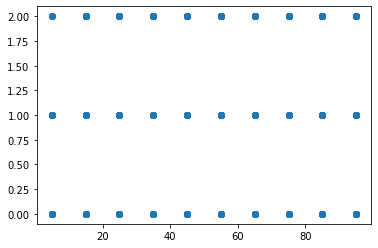

In [33]:
plt.scatter(x.iloc[:,4], y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (71236, 39)
Shape of y_train =  (71236,)
Shape of X_test =  (30530, 39)
Shape of y_test =  (30530,)


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train_sc, y_train)
lrpred=lr.predict(X_test_sc)
lr.score(X_test_sc, y_test)

print ("Accuracy : " , accuracy_score(y_test,lrpred)*100)  
print("Report : \n", classification_report(y_test, lrpred))
print("F1 Score : ",f1_score(y_test, lrpred, average='macro')*100)

Accuracy :  57.517196200458564
Report : 
               precision    recall  f1-score   support

           0       0.59      0.90      0.71     16389
           1       0.52      0.26      0.35     10758
           2       0.41      0.00      0.01      3383

    accuracy                           0.58     30530
   macro avg       0.50      0.39      0.35     30530
weighted avg       0.54      0.58      0.50     30530

F1 Score :  35.45682418312022


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_sc, y_train)
rfpred=rf.predict(X_test_sc)
rf.score(X_test_sc, y_test)

print ("Accuracy : " , accuracy_score(y_test,rfpred)*100)  
print("Report : \n", classification_report(y_test, rfpred))
print("F1 Score : ",f1_score(y_test, rfpred, average='macro')*100)

Accuracy :  59.59384212250246
Report : 
               precision    recall  f1-score   support

           0       0.63      0.83      0.71     16389
           1       0.53      0.42      0.47     10758
           2       0.40      0.03      0.05      3383

    accuracy                           0.60     30530
   macro avg       0.52      0.42      0.41     30530
weighted avg       0.57      0.60      0.55     30530

F1 Score :  40.89795405276891


In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=25, random_state=10)

clf.fit(X_train_sc, y_train)
clfpred=clf.predict(X_test_sc)
clf.score(X_test_sc, y_test)

print ("Accuracy : " , accuracy_score(y_test,clfpred)*100)  
print("Report : \n", classification_report(y_test, clfpred))
print("F1 Score : ",f1_score(y_test, clfpred, average='macro')*100)


Accuracy :  58.244349819849326
Report : 
               precision    recall  f1-score   support

           0       0.61      0.86      0.71     16389
           1       0.50      0.35      0.41     10758
           2       0.00      0.00      0.00      3383

    accuracy                           0.58     30530
   macro avg       0.37      0.40      0.37     30530
weighted avg       0.50      0.58      0.53     30530

F1 Score :  37.4335359308653


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_trainn=pca.fit_transform(X_train_sc)
X_testt=pca.transform(X_test_sc)


from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=5, )
kn.fit(X_trainn,y_train)
knpred=kn.predict(X_testt)
kn.score(X_testt,y_test)

print ("Accuracy : " , accuracy_score(y_test,knpred)*100)  
print("Report : \n", classification_report(y_test, knpred))
print("F1 Score : ",f1_score(y_test, knpred, average='macro')*100)



Accuracy :  50.049132001310184
Report : 
               precision    recall  f1-score   support

           0       0.55      0.74      0.63     16389
           1       0.38      0.29      0.33     10758
           2       0.13      0.02      0.03      3383

    accuracy                           0.50     30530
   macro avg       0.35      0.35      0.33     30530
weighted avg       0.45      0.50      0.46     30530

F1 Score :  32.99327661028872


In [41]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier()
ab.fit(X_train_sc,y_train)
abpred=ab.predict(X_test_sc)
ab.score(X_test_sc,y_test)

print ("Accuracy : " , accuracy_score(y_test,abpred)*100)  
print("Report : \n", classification_report(y_test, abpred))
print("F1 Score : ",f1_score(y_test, abpred, average='macro')*100)


Accuracy :  59.325253848673434
Report : 
               precision    recall  f1-score   support

           0       0.62      0.85      0.72     16389
           1       0.53      0.38      0.44     10758
           2       0.43      0.03      0.06      3383

    accuracy                           0.59     30530
   macro avg       0.52      0.42      0.40     30530
weighted avg       0.56      0.59      0.55     30530

F1 Score :  40.391506574914665


In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

voting_clf = VotingClassifier(estimators=[('LRegression', lr), ('DTree', clf), ('RForest', rf), ('AdaBoost', ab),('knn', kn) ], voting='hard')
voting_clf.fit(X_train_sc, y_train)
pred = voting_clf.predict(X_test_sc)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')

print("Accuracy is: " + str(acc))
print("F1 Score is: " + str(f1))

Accuracy is: 0.5943661971830986
F1 Score is: 0.3827354643379179
